#  1) The Problem

For this model we are trying to predict if a certian cosmic entity is a pulsar star. 

What is a pulsar star?
A pulsar star is the remnant of a massive (larger than our sun) star that has gone a supernova. This leaves behind a dense core made of neutron. This is a neutron star a pulsar is a special class of neutron star. These pulsar stars are classified as such due to thier incredibly strong magnetic field (trillions of times bigger than earth on average). The strong magnetic fields emmit em-waves and are strong enough for radio telescopes to dectect on Earth. The use of these cosmic bodies to physicists is due to their near perfect period. The spin cycle on these stars is the most accurate natural clock in the universe this allows scientists to measure distances on astronomical scale and test the theory of relitivity (most notibly univeral gravity and gravitational waves). 

Given that information the accurate prediction of an entity being a pulsar or not is neccisary to scientific advancement. 

# Preformance Metrix

Due to the nature of the problem we belive that the most important metric from which to measue the effectiveness of our model is precision. Even if we miss a few stars it is better to have minimal false positives because the misidentification of a star could lead to a waste of time and money. 

# 2) Collection of Data

The data collected for this model was provided by www.kaggle.com. This data is the same as what is currently used to identify pulsar stars that is a collection of statistics based on the stars radio waves.

Presentation with more information on pulsar stars. 

http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf

# Code

Imports libraries for data manipulation, models, and model scoring and evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

Reads the csv from local storage.

In [2]:
df = pd.read_csv('pulsar_stars.csv')

# 3) Data Analysis

Gets the shape of the dataframe for preprocessing.

In [3]:
df.shape

(17898, 9)

Prints some values so we can view what each column is named and consists of.

In [4]:
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Retrives data types for all columns so we can evaluate what is ready for preprocessing and what must be converted.

In [5]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

Allows us to view the general distributing of all values. This is a good way to see if particular columns should be standarized and or normalized.

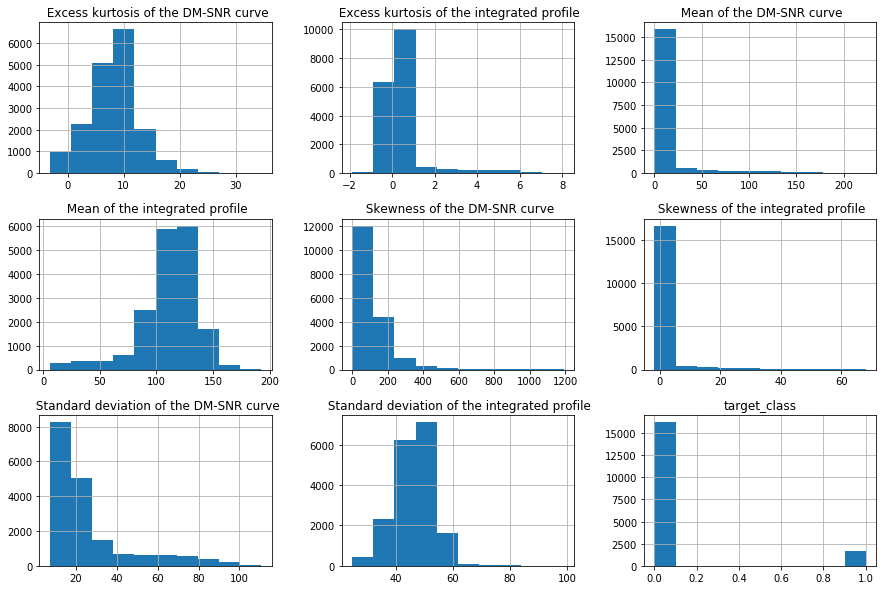

In [6]:
hist = df.hist(figsize=(15,10))

Detailed statistical readout of the values.

In [7]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Table to describe how each column correlates with itself and others.

In [8]:
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


Extracts the correlation of all columns with the target_class column (the column where the entries will be clasified).

In [9]:
correlations = df.corr()
correlations['target_class'].sort_values(ascending=False)

target_class                                     1.000000
 Excess kurtosis of the integrated profile       0.791591
 Skewness of the integrated profile              0.709528
 Standard deviation of the DM-SNR curve          0.491535
 Mean of the DM-SNR curve                        0.400876
 Skewness of the DM-SNR curve                   -0.259117
 Standard deviation of the integrated profile   -0.363708
 Excess kurtosis of the DM-SNR curve            -0.390816
 Mean of the integrated profile                 -0.673181
Name: target_class, dtype: float64

Allows for viewing of common values within each column.

In [10]:
for x in df.columns:
    print(df[x].value_counts())

106.710938    12
112.914062     9
106.648438     9
124.546875     9
116.531250     8
              ..
147.476562     1
114.656250     1
129.257812     1
133.625000     1
48.265625      1
Name:  Mean of the integrated profile, Length: 8626, dtype: int64
42.312627    2
51.042749    2
38.904291    2
47.466371    2
45.035305    2
            ..
50.133883    1
57.140717    1
42.974099    1
31.413432    1
54.000000    1
Name:  Standard deviation of the integrated profile, Length: 17862, dtype: int64
 0.001934    2
 0.199491    1
 0.187485    1
 0.320635    1
-0.019211    1
            ..
 0.416888    1
 5.200189    1
 0.018238    1
-0.514565    1
 1.624541    1
Name:  Excess kurtosis of the integrated profile, Length: 17897, dtype: int64
-0.372092    1
 0.426754    1
 0.242227    1
-0.141561    1
 1.795040    1
            ..
-0.081486    1
-0.245333    1
 0.352747    1
 0.135225    1
 0.178402    1
Name:  Skewness of the integrated profile, Length: 17898, dtype: int64
2.294314     12
2.0501

Saves the feature columns(1-8) and the label column(9) names into seperate variables for preprocessing.

In [11]:
feature_cols = df.columns[0:-1]
label_col = df.columns[-1]

View of the colunms in each variable.

In [12]:
print(feature_cols)
print(label_col)

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')
target_class


# 4) Preprocessing / Feature Engineering

Standarization of all the values in the feature columns. Prints histogram to view the "normal" distribution.

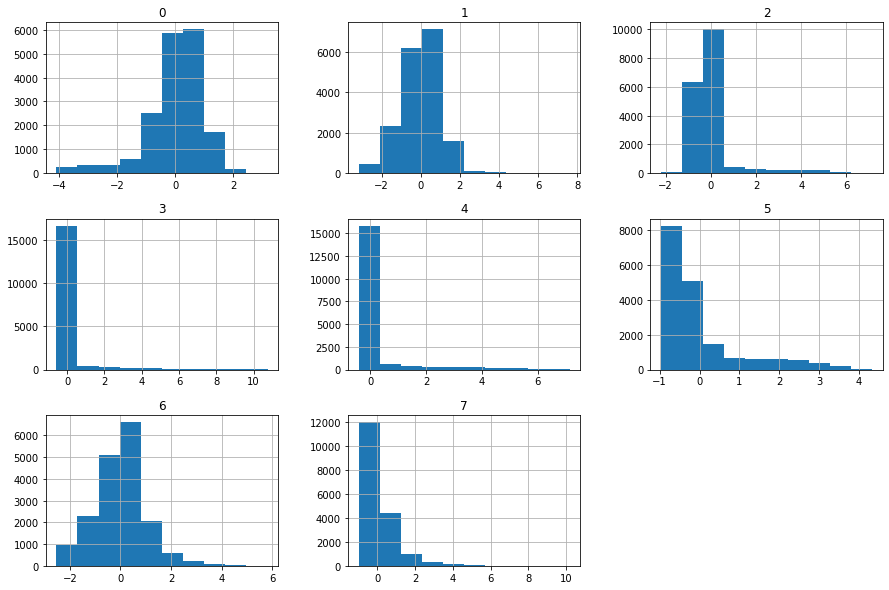

In [13]:
standardization_scaler = preprocessing.StandardScaler()
unscaled_features = df[feature_cols]
standardized_features = standardization_scaler.fit_transform(unscaled_features)
feature_df_standardized = pd.DataFrame(standardized_features)
standard_hist = feature_df_standardized.hist(figsize=(15,10))

Normalization of the standardized feature colunms. Prints for viewing.

In [14]:
normalization_scaler = preprocessing.MinMaxScaler()
standardized_features = feature_df_standardized
standard_norm_features = normalization_scaler.fit_transform(standardized_features)
feature_df_standard_norm = pd.DataFrame(standard_norm_features)
feature_df_standard_norm

,0,1,2,3,4,5,6,7
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369
...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181


# 5) Baseline

Before we run any models we need to set a baseline. 

Currently in order to process these statistic and more to identify pulsar stars scientists currently use a software called Presto that integrates with Pulsar SQL. Essentialy preformes a large sum of Fourier transforms on these datasets and uses harmonics (standing waves) to validate the frequency signal at different integer itervals. 

The reason why machine learning would benefit this problem is due to the abundance of resources used in finding a pulsar star. The data must be sorted in a large database and then intensive calculations must be preformed to get it into a more condenced form. Then the resulting data must be analyzed offten by hand due to the varriety of wave patterns and complexity. While many of these computations must still take place to get the data in form for our model we hope to eliminate the time scientists must take to analize the data.

http://pulsarsearchcollaboratory.com/wp-content/uploads/2016/01/PSC_search_guide.pdf

#  6) Models

The models we have selected to train are: Logistic Regression, K-Nearest-Neighbors, Decision Tree, Random Forest, and Support Vector Classifier.

We we train these models and then see which 2 preform best for further fine tuning. 

Loads the columns into x and y for training and testing.

In [15]:
x = feature_df_standard_norm
y = df[label_col]

Verify data shape before inputing.

In [16]:
print(x.shape)
print(y.shape)

(17898, 8)
(17898,)


Splits the data into a stratified train and test set (80, 20).

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14318, 8) (14318,) (3580, 8) (3580,)


Checks the occurence of the target_class in each set (we want these values to be equal).

In [18]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.908437
1    0.091563
Name: target_class, dtype: float64
0    0.90838
1    0.09162
Name: target_class, dtype: float64


Creates a dictionary with the models to be created, along with a list of their corresponding names.

In [19]:
model_types = {
    "LogisticRegression": LogisticRegression(solver='lbfgs', class_weight={0:1, 1:10}, max_iter=100000),
    "KNeighborsClassifier": KNeighborsClassifier(algorithm='brute'),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight={0:1, 1:10}),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=10, class_weight={0:1, 1:10}),
    "SVC": SVC(class_weight={0:1, 1:10}, max_iter=-1)
}
model_names = list()
for key in model_types:
    model_names.append(key)

Iterates through the models in the dictionary, trains them, and then appends the model into a dictionary for storage.

In [20]:
models = {}
counter = 0
for key in model_types:
    temp_model = model_types[key]
    temp_model.fit(x_train.values, y_train.values)
    models.update({model_names[counter]:temp_model})
    print(temp_model)
    counter += 1

LogisticRegression(C=1.0, class_weight={0: 1, 1: 10}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 10},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
RandomForestCla

Prints the metrix report for all the models along with their names.

In [21]:
for key in models:
    print(key)
    print(classification_report(y_test.values, models[key].predict(x_test.values)))

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.75      0.90      0.82       328

    accuracy                           0.96      3580
   macro avg       0.87      0.93      0.90      3580
weighted avg       0.97      0.96      0.96      3580

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.79      0.84       328

    accuracy                           0.97      3580
   macro avg       0.94      0.89      0.91      3580
weighted avg       0.97      0.97      0.97      3580

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3252
           1       0.78      0.81      0.79       328

    accuracy                           0.96      3580
   macro avg       0.88      0.89      0.89      3580
weighted av

The two models with the highest precision are selected. This is because we want to minimize false positives as the could mean wasted time and reasearch if a star is misidenttified. The others are deleted.

In [22]:
del models['LogisticRegression']
del models['DecisionTreeClassifier']
del models['SVC']

Cross validation for our models for precision.

In [23]:
for key in models:
    print(np.mean(cross_val_score(models[key], x, y, cv=5, scoring='precision')))

0.9207377835245534
0.9387615981293397


Random search for best randomforest hyperparameters using a blank model. Random search is chosen because the amount of combinations for a gridsearch would not be a feasible task. 

In [24]:
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rfc = RandomForestClassifier()

rs = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 10, n_jobs = -1, cv = 5, verbose=2, scoring='precision')
rs.fit(x_train.values, y_train.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Best parameters found by the random search. 

In [25]:
rs.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

Replaces the old random forest model with the hyperparameter tuned version.

In [26]:
models['RandomForestClassifier'] = rs.best_estimator_
models['RandomForestClassifier'].fit(x_train.values, y_train.values)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Preformance metrix for new random forest model.

In [27]:
 print(classification_report(y_test.values, models['RandomForestClassifier'].predict(x_test.values)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.92      0.82      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



Gridsearch for best hyperparameters for the K-nearest-neighbors model. Due to a lower number of combinations this search is possible.

In [28]:
knn_params = {
    'n_neighbors': [5,10,100],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, knn_params, cv=5, scoring='precision')
gs.fit(x_train.values, y_train.values)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

Prints the best hyperparameters found by the grid search.

In [29]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 100}

Replaces the old k-nearest-neighbors model with the hyperparameter tuned version.

In [30]:
models['KNeighborsClassifier'] = gs.best_estimator_
models['KNeighborsClassifier'].fit(x_train.values, y_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

Preformance metrix for the new k-nearest-neighbors model.

In [31]:
print(classification_report(y_test.values, models['KNeighborsClassifier'].predict(x_test.values)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3252
           1       0.95      0.73      0.83       328

    accuracy                           0.97      3580
   macro avg       0.96      0.87      0.91      3580
weighted avg       0.97      0.97      0.97      3580



# 7) Deploy Monitor Maintain

# Deploy

For rollout we would have this model in labratories where scientist analyze any cosmic entity. To evaluate time saved we could take n pulsar stars and run an empirical test for time to prove our solution works allowing its implimentation.

# Monitor

In order to monitor our model we can evalutate its preformance periodicaly on non pulsar stars to see if it is making any mistakes.

# Maintain

When monitoring our solution if any major erros arise we can then evaluate any major peformance issues and adjust the model if neccisary to make more accurate predictions. 

# 8) Summary

Overall our models preform well. 
Ideally it would be nice to be able to contiuously feed new data to the model to enhance its preformance. This is an impossiblity due to the scarcity of the data available and the hope that the implementation of our model would end the need to hand find pulsars. A future iteration would be difficult other than fine tuning this current iteration. The key results we see are that reaching high precision is possible, but at a large cost of recall. While our objective is to minimize incorrcect identification, we seem to be missing a great many stars. 